

<center>
  <img src="./OIG.jpg" width="30%">
</center>

Embarking on this project involves an in-depth exploration of a transportation dataset using Python's pandas library. The dataset is a treasure trove of information on diverse transportation modes, encompassing airports, train stations, and ferry terminals. We should be able to use other graphical tools like Matplotlib to help us visually represent numbers and information more effectively

### 1. Loading of the dataset as a dataframe. You may download the .csv and open it, or, as a more interesting option, you may directly load the dataset directly from the URL

First of all, we have to import our libreries, and we're ready to read our dataframe as url

In [3]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports-extended.dat', header= None)




### 2. Show the first 10 rows of the dataframe

In [132]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
5,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport,OurAirports
6,7,Narsarsuaq Airport,Narssarssuaq,Greenland,UAK,BGBW,61.160500,-45.425999,112,-3,E,America/Godthab,airport,OurAirports
7,8,Godthaab / Nuuk Airport,Godthaab,Greenland,GOH,BGGH,64.190903,-51.678101,283,-3,E,America/Godthab,airport,OurAirports
8,9,Kangerlussuaq Airport,Sondrestrom,Greenland,SFJ,BGSF,67.012222,-50.711603,165,-3,E,America/Godthab,airport,OurAirports
9,10,Thule Air Base,Thule,Greenland,THU,BGTL,76.531197,-68.703201,251,-4,E,America/Thule,airport,OurAirports


### 3. Obtain a statistical summary and interpret the output (you can choose to explain using text or complement with graphical tools)

To be honest, after several attempts to plot, I realized that these data... make no sense when it comes to calculating or graphing using the describe function, except for the total quantity of airports we have. Columns 6, 7, and 8 represent latitude, longitude, and altitude, respectively.

In [133]:

df.describe()

,0,6,7,8
count,12668.000000,12668.000000,12668.000000,12668.000000
mean,7311.584465,29.820510,-1.041145,831.871093
std,4202.520098,26.923942,83.618663,1498.239733
min,1.000000,-90.000000,-179.876999,-1266.000000
25%,3349.750000,16.115875,-77.294770,38.000000
50%,7771.500000,38.341850,6.955411,232.500000
75%,10943.250000,49.306042,47.835824,883.500000
max,14111.000000,90.000000,179.951004,14472.000000


I will give the DataFrame a bit more meaning by renaming columns for the describe function

In [134]:
# Generate a summary statistics DataFrame using the describe() method and reset the index.
summary = df.describe().reset_index()

# Rename the columns of the summary DataFrame to make them more descriptive.
summary_index = summary.rename(columns={0: 'Airport_ID', 6: 'Latitude', 7: 'Longitude', 8: 'Altitude'})


summary_index

,index,Airport_ID,Latitude,Longitude,Altitude
0,count,12668.000000,12668.000000,12668.000000,12668.000000
1,mean,7311.584465,29.820510,-1.041145,831.871093
2,std,4202.520098,26.923942,83.618663,1498.239733
3,min,1.000000,-90.000000,-179.876999,-1266.000000
4,25%,3349.750000,16.115875,-77.294770,38.000000
5,50%,7771.500000,38.341850,6.955411,232.500000
6,75%,10943.250000,49.306042,47.835824,883.500000
7,max,14111.000000,90.000000,179.951004,14472.000000


Now we will plot the statistics.

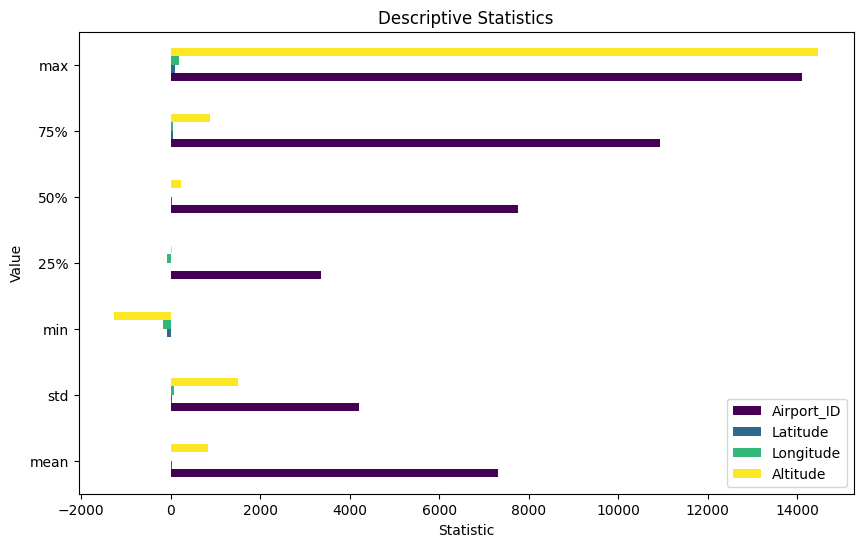

In [135]:

# Remove the 'count' row to avoid affecting the scale of the chart
summary_index = summary_index[1:]

# Create a bar chart
summary_index.plot(x='index', kind='barh', figsize=(10, 6), colormap='viridis')

# Customize the chart
plt.title('Descriptive Statistics')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.show()


I tried playing with other values, such as the number of airports per country or per time zone.

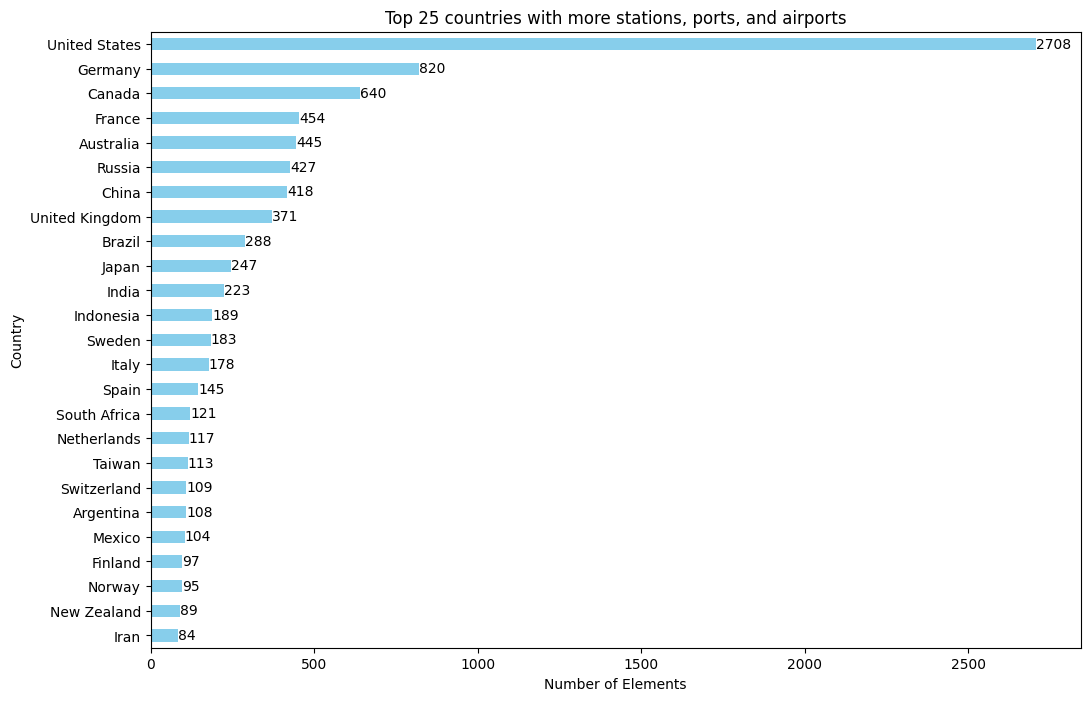

In [136]:
# Display only the top 25 countries
airport_count_by_country = df[3].value_counts()
top_countries = airport_count_by_country.head(25)
top_countries_sorted = top_countries.sort_values(ascending=True)

# Create a bar chart
plt.figure(figsize=(12, 8))
ax = top_countries_sorted.plot(kind='barh', color='skyblue')
plt.title('Top 25 countries with more stations, ports, and airports')
plt.xlabel('Number of Elements')
plt.ylabel('Country')

# Display the values on the bars
for index, value in enumerate(top_countries_sorted):
    ax.text(value, index, str(value), ha='left', va='center')

plt.show()

It seems that the United States has a lot of airports. It is the country with the most airports by far. Let's look at their proportion. Its seems like US has 0.21 (21%) of total airports

In [137]:
df[3].value_counts(normalize=True)

3
United States                     0.213767
Germany                           0.064730
Canada                            0.050521
France                            0.035838
Australia                         0.035128
                                    ...   
Palestine                         0.000079
Anguilla                          0.000079
Mayotte                           0.000079
British Indian Ocean Territory    0.000079
Juan de Nova Island               0.000079
Name: proportion, Length: 241, dtype: float64

Now let's look at the hourly distribution

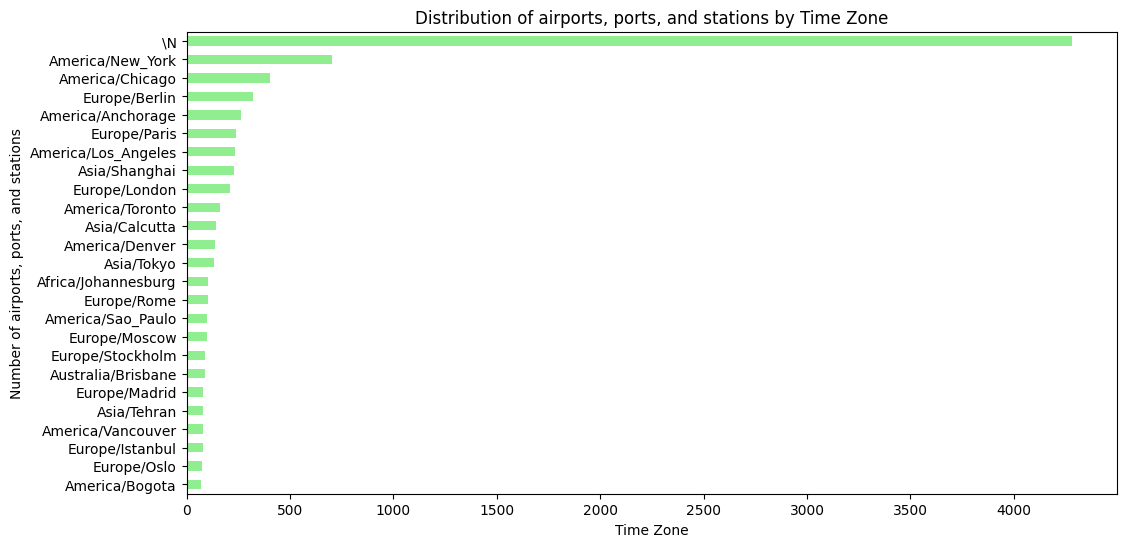

In [138]:
# Count the number of airports, ports, and stations per time zone
top_timezones = df[11].value_counts()
top_timezones_max = top_timezones.head(25)
top_timezones_sorted = top_timezones_max.sort_values(ascending=True)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_timezones_sorted.plot(kind='barh', color='lightgreen')
plt.title('Distribution of airports, ports, and stations by Time Zone')
plt.xlabel('Time Zone')
plt.ylabel('Number of airports, ports, and stations')
plt.show()

Now let's look at the hourly distribution. It seems there are many '\N' (null) values in the dataframa

### 4. For this analysis we are not going to use the 'AirportID', 'Latitude', 'Longitude' and 'Altitude' columns, remove them from the dataframe.

In [139]:
# The following code creates a new DataFrame 'df_10' by dropping specific columns from the original DataFrame 'df'
df_10 = df.drop(df.columns[[0, 6, 7, 8]], axis= 1)
df_10


,1,2,3,4,5,9,10,11,12,13
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,10,U,Pacific/Port_Moresby,airport,OurAirports
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...
12663,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,\N,\N,\N,airport,OurAirports
12664,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,\N,\N,\N,airport,OurAirports
12665,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,\N,\N,\N,airport,OurAirports
12666,Melitopol Air Base,Melitopol,Ukraine,\N,UKDM,\N,\N,\N,airport,OurAirports


### 5. Get a statistical summary again, how has the data changed?


In [140]:
# Generate and display descriptive statistics for the DataFrame 'df_10'
df_10.describe()

,1,2,3,4,5,9,10,11,12,13
count,12668,12619,12668,12668,12667,12668,12668,12668,12668,12668
unique,12330,9673,241,6925,8161,42,8,312,5,4
top,North Sea,New York,United States,\N,\N,1,E,\N,airport,OurAirports
freq,21,50,2708,5744,4507,2706,3478,4282,8264,7698


the change involved removing specific numeric columns from the original DataFrame and creating a new DataFrame focused on categorical data related to airport information. The context of the data shifted from numeric statistics to categorical details about airports

### 6. In the statistical summary mentioned earlier, it appears that in the TZ (time zone) column there is an unusual value, "\N". Determine the proportion of these values using the value_counts method.


We are going to count all the TZ of the dataframe

In [141]:

# Create a DataFrame 'tz_ports' by counting the occurrences of unique values in column 9 ('TZ').
# Sort the values in ascending order and reset the index.
tz_ports = df_10[9].value_counts().sort_values(ascending=True).reset_index()

# Rename the columns of 'tz_ports' to 'TZ' and 'ports'.
tz_ports.columns = ['TZ', 'Ports']



Let's see the result

In [142]:
tz_ports

,TZ,Ports
0,5.45,1
1,-12,1
2,10.5,1
3,13.5,1
4,5.3,1
5,4.3,1
6,12.75,2
7,-9.5,4
8,-2,6
9,-11,6


Let's get the \N out of our dataframe


In [103]:
# Filter the DataFrame 'tz_airports' to exclude entries where the 'TZ' column has the value '\N'.
tz_cleaned = tz_ports[tz_ports['TZ'] != '\\N']


Now we can make a graph, to get a better idea of ​​this data

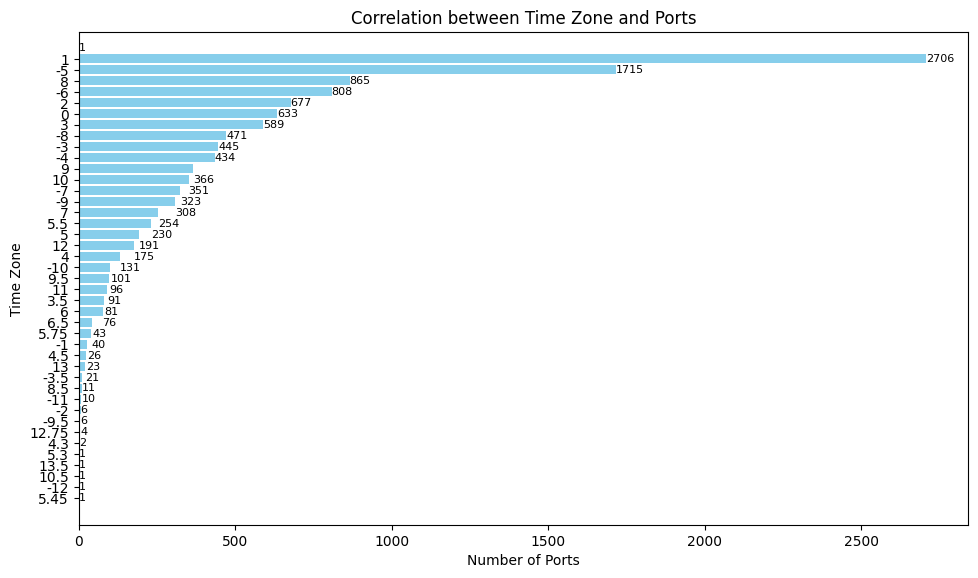

In [104]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(tz_cleaned['TZ'], tz_cleaned['Ports'], color='skyblue')
plt.title('Correlation between Time Zone and Ports')
plt.xlabel('Number of Ports')
plt.ylabel('Time Zone')

# Display the frequency on each bar
for i, value in enumerate(tz_cleaned['Ports']):
    plt.text(value, tz_cleaned.index[i-1], str(value), ha='left', va='center', fontsize=8)

# Adjust layout for better presentation
plt.tight_layout(pad=1.5)

# Show the plot
plt.show()



### 7. Reload the dataset so that null values are correctly interpreted (repeat section 4, delete columns).

In [4]:
# Read data from the provided URL into a DataFrame 'df'.
# Specify that the data has no header and replace '\N' and 'unknown' with NaN for missing values.
df = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports-extended.dat', header=None, na_values=[r"\N", "unknown"])

# Rename columns for better readability.
df = df.rename(columns={0: 'Airport_ID', 1: 'Name', 2: 'City', 3: 'Country', 4: 'IATA', 5: 'ICAO', 6: 'Latitude', 7: 'Longitude', 8: 'Altitude', 9: 'TZ', 10: 'DST', 11: 'DB_Timezone', 12: 'Type', 13: 'Source'})

# Create a clean DataFrame 'df_clean' by dropping specific columns (indices 0, 6, 7, 8) from 'df'.
df_clean = df.drop(df.columns[[0, 6, 7, 8]], axis=1)


### 8. Check the entire dataframe for null values.

Now we will see the number of NaN values in the DataFrame.

In [5]:

# Create a DataFrame 'NaN_frame' to count and display the number of NaN values in each column of 'df_clean'.
NaN_frame = df_clean.isna().sum().reset_index()

# Rename the columns of 'NaN_frame' to 'Name' and 'NaN_values'.
NaN_frame = NaN_frame.rename(columns={'index': 'Name', 0: 'NaN_values'})

# Sort 'NaN_frame' by the number of NaN values in ascending order.
NaN_frame_sorted = NaN_frame.sort_values(by='NaN_values', ascending=True)


NaN_frame

,Name,NaN_values
0,Name,0
1,City,49
2,Country,0
3,IATA,5744
4,ICAO,4508
5,TZ,353
6,DST,353
7,DB_Timezone,4282
8,Type,2971
9,Source,1651


We can make these numbers clearer

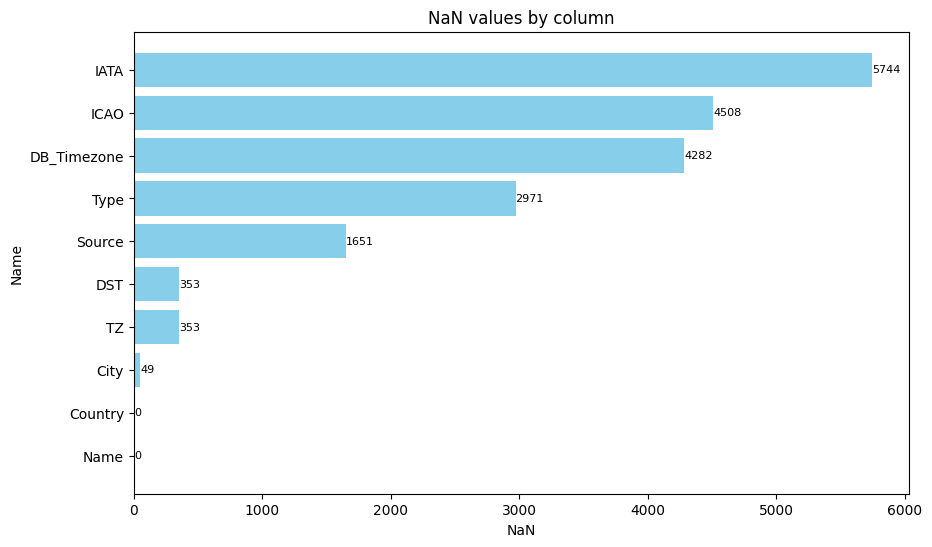

In [6]:
# Create a horizontal bar chart to visualize the NaN values in each column.
plt.figure(figsize=(10, 6))
bars = plt.barh(NaN_frame_sorted['Name'], NaN_frame_sorted['NaN_values'], color='skyblue')
plt.title('NaN values by column')
plt.xlabel('NaN')
plt.ylabel('Name')

# Display the count of NaN values on each bar.
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=8)

# Display the DataFrame 'NaN_frame'.

We have a total of 19,911 NaN values.

In [7]:
NaN_frame['NaN_values'].sum()

19911

### 9. Overwrite the null values of the IATA and ICAO columns with the string 'UNKNOWN'.


In [8]:
# Create a new DataFrame 'df_filled' by using the fillna method to replace NaN values in 'df_clean' specifically for 'IATA' and 'ICAO' columns.
df_filled = df_clean.copy()
df_filled[['IATA', 'ICAO']] = df_filled[['IATA', 'ICAO']].fillna("UNKNOWN")

# Display the resulting DataFrame.
df_filled

,Name,City,Country,IATA,ICAO,TZ,DST,DB_Timezone,Type,Source
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,10.0,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...
12663,Ulan-Ude East Airport,Ulan Ude,Russia,UNKNOWN,XIUW,NaN,NaN,NaN,airport,OurAirports
12664,Krechevitsy Air Base,Novgorod,Russia,UNKNOWN,ULLK,NaN,NaN,NaN,airport,OurAirports
12665,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,NaN,NaN,NaN,airport,OurAirports
12666,Melitopol Air Base,Melitopol,Ukraine,UNKNOWN,UKDM,NaN,NaN,NaN,airport,OurAirports


### 10. Change the type of the DST and TZ variables to categorical.

In [9]:

# Change the type of 'DST' and 'TZ' columns to categorical
df_filled[['DST', 'TZ']] = df_filled[['DST', 'TZ']].astype('category')

# Display the data types of the DataFrame after the change
df_filled.dtypes

Name             object
City             object
Country          object
IATA             object
ICAO             object
TZ             category
DST            category
DB_Timezone      object
Type             object
Source           object
dtype: object

### 11. Obtain a statistical summary of the categorical variables.

In [10]:
# Generate and display descriptive statistics for the 'TZ' and 'DST' columns in the DataFrame 'df_filled'.
df_filled[['TZ', 'DST']].describe()


,TZ,DST
count,12315.0,12315
unique,41.0,7
top,1.0,E
freq,2706.0,3478


### 12. Group the data frame by airport type, showing the type count. Consider the best way to communicate the results; a plot might be helpful.

Let's take a look at the quantity of data per type.


In [11]:
# Group the DataFrame 'df_filled' by the 'Type' column and count occurrences of each type.
df_filled["Type"].value_counts()

Type
airport    8264
station    1332
port        101
Name: count, dtype: int64

Now we will plot these values, using a new variable to store the count in a well-formed DataFrame.

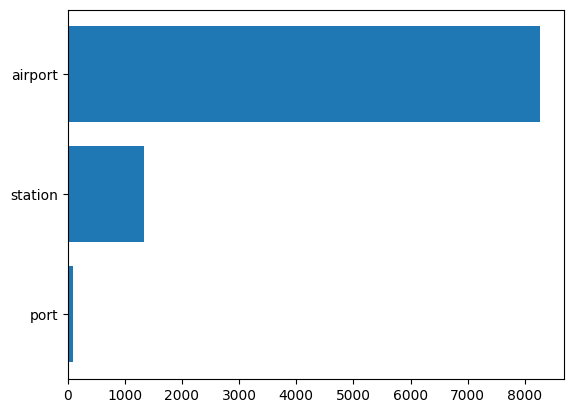

,Type,count
0,airport,8264
1,station,1332
2,port,101


In [12]:
# Create a DataFrame 'df_type' counting occurrences of each unique value in the 'Type' column of 'df_filled'.
df_type = df_filled["Type"].value_counts().reset_index()

# Sort 'df_type' by the count of occurrences in ascending order.
df_type_sorted = df_type.sort_values(by='count', ascending=True)

# Create a horizontal bar chart to visualize the distribution of airport types and their counts.
plt.barh(df_type_sorted["Type"], df_type_sorted["count"])
plt.show()

# Display the original 'df_type' DataFrame showing counts of each airport type.
df_type


### 13. Select the names of cities where the airport type is "port," ensuring no repeated entries. How many cities have at least one port?

This was a bit tricky for me; I didn't know that iloc could be used in this way. However, using it this way, we can determine that we have at least 90 cities with at least one port

In [13]:
#Extract the unique values in the 'City' column for these entries and reset the index.
city_unique = df_filled[df_filled["Type"] == "port"].loc[:,"City"].drop_duplicates().reset_index()

city_unique

,index,City
0,6074,Macau
1,6438,Stockholm
2,6439,Helsingborg
3,6444,Helsinki
4,6565,Sakaiminato
...,...,...
85,9866,Quebec
86,9948,Ludington
87,9949,Manitowoc
88,10207,Osaka


However, using it this way, we can determine that we have at least 90 cities with at least one port

### 14. Show all rows for the fields: name of the airport, name of the country, and name of the city for airports located in Spain

I will use a double filter. First, to have a dataframe only with rows containing 'Spain' in the 'Country' column, and then another variable to store the filtering considering only the airports.

In [14]:
# Filter the DataFrame 'df_filled' to include only entries with the 'Country' column equal to "Spain".
df_spain = df_filled[df_filled['Country'] == "Spain"]

# Further filter 'df_spain' to include only entries where the 'Type' column is equal to "airport".
df_spain_airport = df_spain[df_spain['Type'] == "airport"]

df_spain_airport[['Name', 'Country', 'City']]

,Name,Country,City
1030,Fuerteventura Airport,Spain,Fuerteventura
1031,Hierro Airport,Spain,Hierro
1032,La Palma Airport,Spain,Santa Cruz De La Palma
1033,Gran Canaria Airport,Spain,Gran Canaria
1034,Lanzarote Airport,Spain,Arrecife
...,...,...,...
10435,Cuatro Vientos Airport,Spain,Madrid
10436,Castellón-Costa Azahar Airport,Spain,Castellón de la Plana
10437,Teruel Airport,Spain,Teruel
12234,Algeciras Heliport,Spain,Algeciras


As a curious fact, we will see which cities have the most airports in Spain

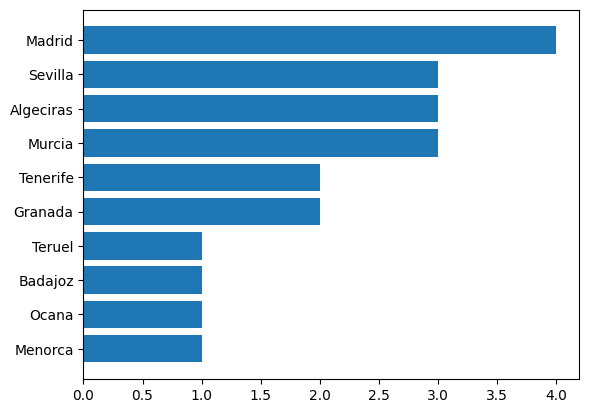

In [159]:
# Count the occurrences of each unique city in Spain's airports, sort in ascending order, reset the index, and select the last 10 rows.
df_spain_city = df_spain_airport['City'].value_counts(ascending=True).reset_index().tail(10)

# Create a horizontal bar chart to visualize the distribution of cities based on the count of airports.
plt.barh(df_spain_city['City'], df_spain_city['count'])

# Display the generated horizontal bar plot.
plt.show()

### 15. Show the names of the countries and airports belonging to the cities of Madrid and Barcelona. Are all the records from Spain?

In [23]:
# Filter the DataFrame 'df_filled' to include only entries for the cities 'Barcelona' or 'Madrid'.
Madrid_Barcelona = df_filled[(df_filled['City'] == 'Barcelona') | (df_filled['City'] == 'Madrid')]

Madrid_Barcelona

,Name,City,Country,IATA,ICAO,TZ,DST,DB_Timezone,Type,Source
1188,Barcelona International Airport,Barcelona,Spain,BCN,LEBL,1.0,E,Europe/Madrid,airport,OurAirports
1194,Getafe Air Base,Madrid,Spain,UNKNOWN,LEGT,1.0,E,Europe/Madrid,airport,OurAirports
1198,Adolfo Suárez Madrid–Barajas Airport,Madrid,Spain,MAD,LEMD,1.0,E,Europe/Madrid,airport,OurAirports
1214,Torrejón Airport,Madrid,Spain,TOJ,LETO,1.0,E,Europe/Madrid,airport,OurAirports
1217,Cuatro Vientos,Madrid,Spain,UNKNOWN,LEVS,1.0,E,Europe/Madrid,NaN,Legacy
2690,General José Antonio Anzoategui International ...,Barcelona,Venezuela,BLA,SVBC,-4.0,U,America/Caracas,airport,OurAirports
6302,Barcelona Cruise Terminal,Barcelona,Spain,UNKNOWN,UNKNOWN,1.0,E,Europe/Madrid,NaN,User
8046,Atocha,Madrid,Spain,UNKNOWN,MDAT,1.0,E,Europe/Madrid,NaN,User
8053,Chamartin Station,Madrid,Spain,UNKNOWN,MADC,1.0,E,Europe/Madrid,station,User
8055,Aeroport,Barcelona,Spain,UNKNOWN,ARPT,1.0,E,Europe/Madrid,NaN,User


It seems that we have an airport from another country that coincides with another Barcelona

In [24]:
#Further filter the 'Madrid_Barcelona' DataFrame to exclude entries where the 'Country' is 'Venezuela'
Madrid_Barcelona = Madrid_Barcelona[Madrid_Barcelona['Country'] != 'Venezuela']

Madrid_Barcelona

,Name,City,Country,IATA,ICAO,TZ,DST,DB_Timezone,Type,Source
1188,Barcelona International Airport,Barcelona,Spain,BCN,LEBL,1.0,E,Europe/Madrid,airport,OurAirports
1194,Getafe Air Base,Madrid,Spain,UNKNOWN,LEGT,1.0,E,Europe/Madrid,airport,OurAirports
1198,Adolfo Suárez Madrid–Barajas Airport,Madrid,Spain,MAD,LEMD,1.0,E,Europe/Madrid,airport,OurAirports
1214,Torrejón Airport,Madrid,Spain,TOJ,LETO,1.0,E,Europe/Madrid,airport,OurAirports
1217,Cuatro Vientos,Madrid,Spain,UNKNOWN,LEVS,1.0,E,Europe/Madrid,NaN,Legacy
6302,Barcelona Cruise Terminal,Barcelona,Spain,UNKNOWN,UNKNOWN,1.0,E,Europe/Madrid,NaN,User
8046,Atocha,Madrid,Spain,UNKNOWN,MDAT,1.0,E,Europe/Madrid,NaN,User
8053,Chamartin Station,Madrid,Spain,UNKNOWN,MADC,1.0,E,Europe/Madrid,station,User
8055,Aeroport,Barcelona,Spain,UNKNOWN,ARPT,1.0,E,Europe/Madrid,NaN,User
8056,Passeig de Gracia,Barcelona,Spain,UNKNOWN,PGRC,1.0,U,Europe/Madrid,NaN,User


Problem solved.

### 16. Save the previous results in a .csv file named Madrid_Barcelona.csv

In [27]:
Madrid_Barcelona.to_csv('./Madrid_Barcelona.csv')

Now we have an entire dataframe that includes ports, airports, stations, etc. It will be saved as a CSV and can be found in the same folder as this notebook for future use